#Hotel Booking Cancellation prediction
---


## Motivation

1. **Maximize revenue through OverBook**

  During peak season, it is ideal to have all rooms occupied. Unfortunately, cancellations happen for various reasons. If the hotel know which bookings are highly likely cancelled, they can allow additional bookings for these rooms (overbook).

2. **Customer retention and satisfaction**

  Knowing customers are going to canceled, the hotel can proactively reach out to them for additional support/offers (such as room upgrade or dining vouchers) to encourage them keep their bookings. **Feature importance** will be calculated later to help hotels better customize their offers (example, if the booking is cancelled and the "Number of Children" feature is of high importance, the hotel can offer babysit services or airport pickup with children car seats)


3. **Operational efficiency and resource allocation**

  The hotel can better schedule staff and manage inventory (fresh ingredients) according to number of actual reservations. For example, if there are chances that 5 bookings will be cancelled on a day, the hotel can put one staff in on-call mode (in case the customers show up) to save cost. Furthermore, if a booking is likely to be cancelled, other rooms will be prioritized for cleaning first.

## Import necessary libraries and load data

Please find the dataset csv file at: https://drive.google.com/file/d/1ZoZROBtTZJ_Rgk5m7hiCfdhEiXEn7M-A/view?usp=drive_link

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a useful library for Data Visualisation
from scipy.stats import skewnorm
from sklearn.model_selection import train_test_split

In [4]:
# Save the dataset to your google drive
# Change the link inside quotation marks to the directory of the dataset on your google drive
df = pd.read_csv("/content/drive/MyDrive/ai-ml/final-project/booking_with_null.csv")

## Exploratory Data Analysis (EDA)

1.   List item
2.   List item



### Quick look through data

In [5]:
df.head(5)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1.0,1.0,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1.0,0.0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2.0,1.0,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1.0,0.0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1.0,0.0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [6]:
df.sample(5)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
18288,INN18289,2.0,0.0,2,2,Meal Plan 1,0,Room_Type 1,155,Online,0,0,0,85.00,1,11/25/2018,Canceled
14173,INN14174,2.0,0.0,0,1,Meal Plan 1,0,Room_Type 4,1,Online,0,0,0,176.00,1,5/20/2018,Not_Canceled
18948,INN18949,2.0,0.0,1,3,Meal Plan 1,0,Room_Type 2,16,Online,0,0,0,86.25,0,1/18/2018,Not_Canceled
30559,INN30560,2.0,0.0,1,2,Meal Plan 1,0,Room_Type 1,52,Online,0,0,0,73.20,1,11/6/2017,Not_Canceled
19685,INN19686,2.0,0.0,0,2,Meal Plan 1,0,Room_Type 1,322,Offline,0,0,0,52.00,0,12/9/2018,Not_Canceled


In [7]:
# The data set has 36285 rows and 17 columns
df.shape

(36285, 17)

In [8]:
# 6 features of type object
df.dtypes

Booking_ID                   object
number of adults            float64
number of children          float64
number of weekend nights      int64
number of week nights         int64
type of meal                 object
car parking space             int64
room type                    object
lead time                     int64
market segment type          object
repeated                      int64
P-C                           int64
P-not-C                       int64
average price               float64
special requests              int64
date of reservation          object
booking status               object
dtype: object

In [9]:
# number of unique values for each attributes
df.nunique()

Booking_ID                  36285
number of adults                5
number of children              6
number of weekend nights        8
number of week nights          18
type of meal                    4
car parking space               2
room type                       7
lead time                     352
market segment type             5
repeated                        2
P-C                             9
P-not-C                        59
average price                3930
special requests                6
date of reservation           553
booking status                  2
dtype: int64

In [10]:
# Imbalanced targets
df['booking status'].value_counts()

Not_Canceled    24396
Canceled        11889
Name: booking status, dtype: int64

In [11]:
# Summary of the central tendency, dispersion, and shape of the distribution of numerical data
# 75% of bookings are for 2 adults and 0 child.
# 75% for 2 weekend nights and 3 week nights
# 75% doesn't require car parking
# Most booking are not repeated
# 50% doesn't have any special request
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36185.000000,36185.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844742,0.105292,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518926,0.402665,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


## Data splitting

* 10% test set - 90% train set
* There is no need for further data split to have a validation set because the team will use kfold cross validation later.

Note: Ensure every member has the same sklearn version, same random state, and same method

In [12]:
# To avoid bias, we will create two set of data (seen and unseen) for training and testing
# Features - X and target - y
X = df.drop(columns = ['booking status', 'Booking_ID'], axis = 1)
y= df['booking status']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=11)

In [13]:
# Create a dataframe for EDA and model building
df_train = X_train
df_train['booking status'] = y_train
df_train.head(5)

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
2168,2.0,0.0,1,2,Meal Plan 1,0,Room_Type 1,207,Offline,0,0,0,95.0,0,12/30/2018,Not_Canceled
7150,1.0,0.0,0,2,Meal Plan 1,0,Room_Type 1,64,Corporate,0,0,0,130.0,0,5/17/2018,Not_Canceled
35835,2.0,0.0,1,1,Meal Plan 1,0,Room_Type 1,33,Corporate,0,0,0,62.0,0,1/25/2018,Canceled
11426,2.0,0.0,2,1,Meal Plan 1,0,Room_Type 1,12,Online,0,0,0,124.0,2,9/20/2017,Not_Canceled
8940,2.0,0.0,2,1,Meal Plan 1,0,Room_Type 1,25,Online,0,0,0,72.8,0,2/14/2018,Canceled


## Data visualization



### Univariate analysis

#### Analysing the target variables

Let's start with analysing our target variable which would be "canceled" or 'not-canceled' in this case.

Based on a quick peek at the data types earlier we know that 'booking status' will likely be a nominal / categorical variable due to being encoded as an object.

So to have a look at the "shape" of such a distribution we won't use a histogram or a boxplot but a countplot

<Axes: xlabel='booking status', ylabel='count'>

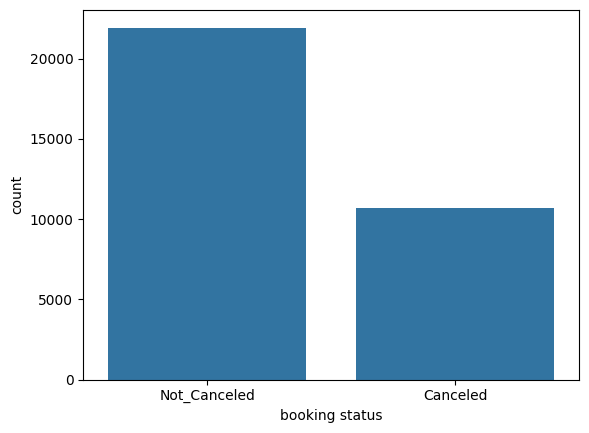

In [14]:
sns.countplot(data = df_train, x = 'booking status')

#### Analysing the feature variables

<Axes: xlabel='number of adults', ylabel='count'>

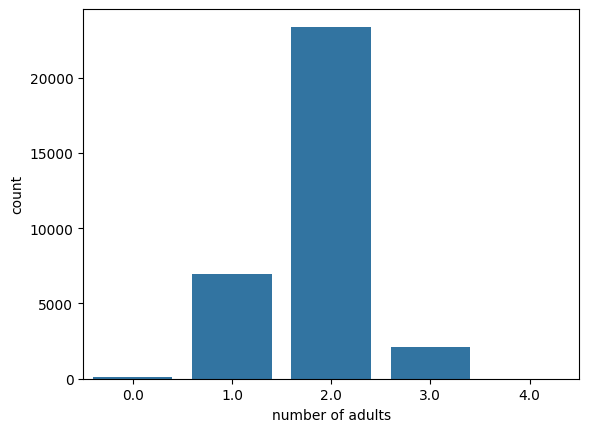

In [15]:
# number of adults per booking
sns.countplot(data = df_train, x = 'number of adults')

<Axes: xlabel='number of children', ylabel='count'>

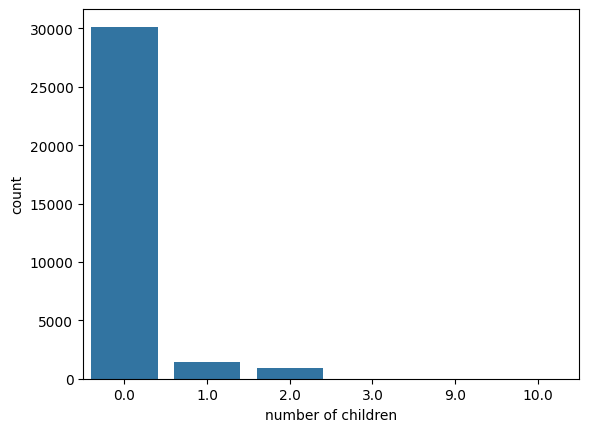

In [16]:
# number of children per booking
sns.countplot(data = df_train, x = 'number of children')

<Axes: xlabel='number of week nights', ylabel='count'>

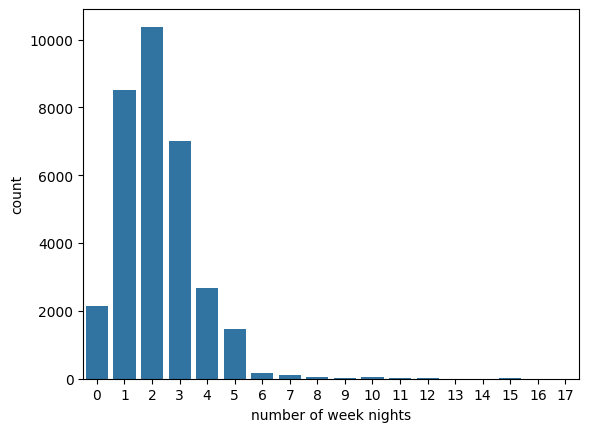

In [17]:
# number of week nights
sns.countplot(data = df_train, x = 'number of week nights')

<Axes: xlabel='number of weekend nights', ylabel='count'>

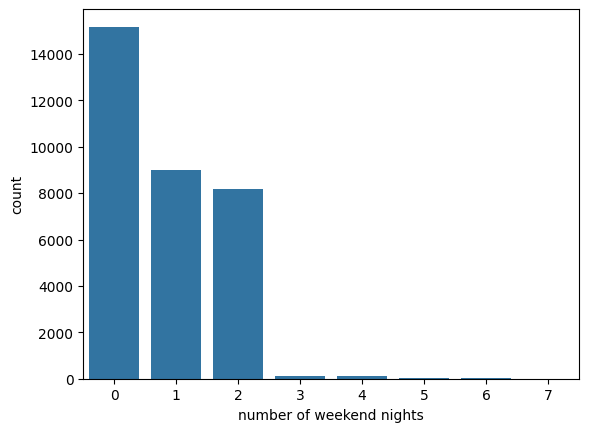

In [18]:
# number of weekend nights
sns.countplot(data = df_train, x = 'number of weekend nights')

<Axes: xlabel='type of meal', ylabel='count'>

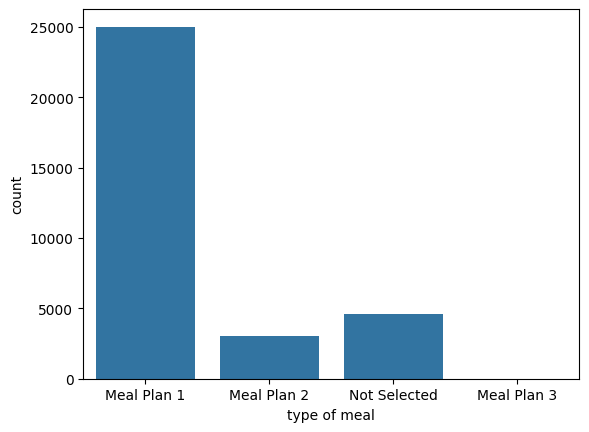

In [19]:
# type of meal
sns.countplot(data = df_train, x = "type of meal")

<Axes: xlabel='car parking space', ylabel='count'>

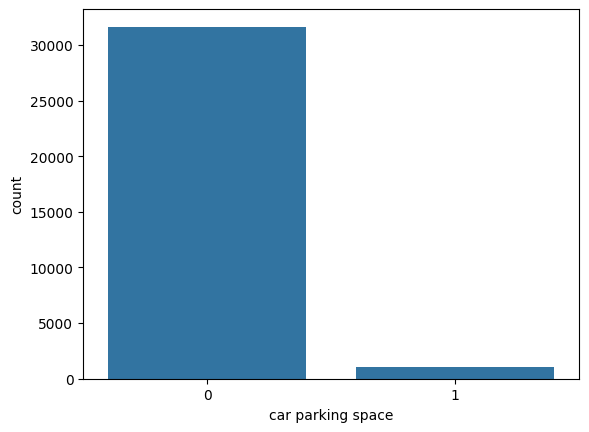

In [20]:
# Car parking space
sns.countplot(data = df_train, x = "car parking space")

<Axes: xlabel='room type', ylabel='count'>

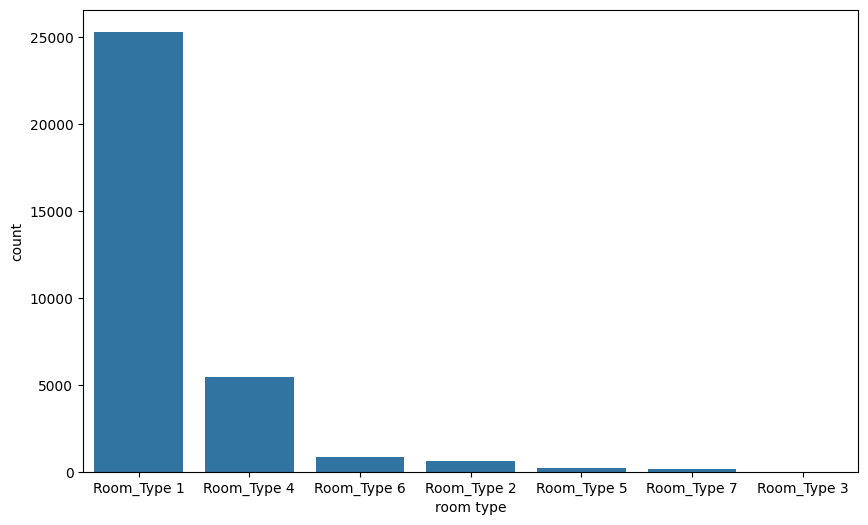

In [21]:
# Room type
plt.figure(figsize=(10, 6))
sns.countplot(data = df_train, x = "room type", order=df_train['room type'].value_counts().index)

<Axes: xlabel='lead time', ylabel='Count'>

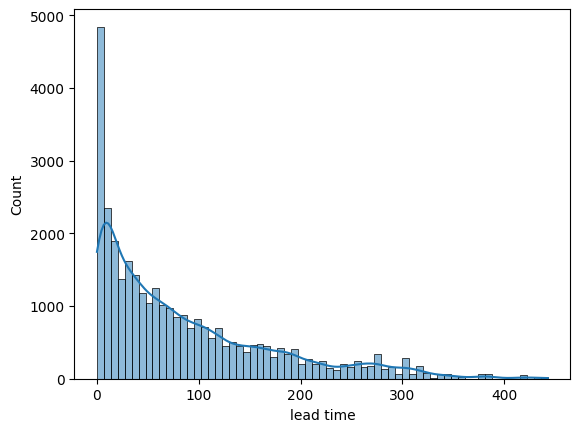

In [22]:
# lead time
sns.histplot(data = df_train, x = "lead time", kde = True)

<Axes: xlabel='market segment type', ylabel='count'>

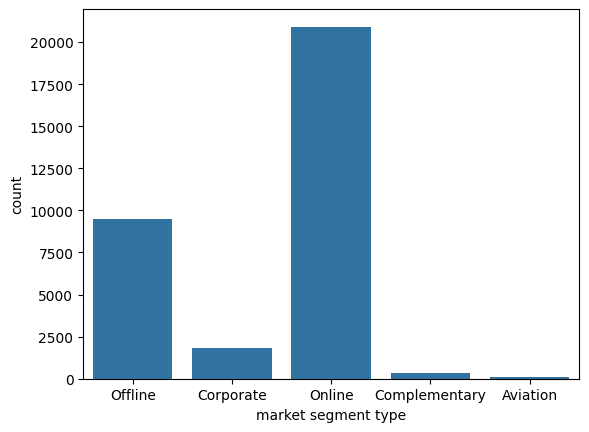

In [23]:
# market segment type
sns.countplot(data = df_train, x = "market segment type")

<Axes: xlabel='repeated', ylabel='count'>

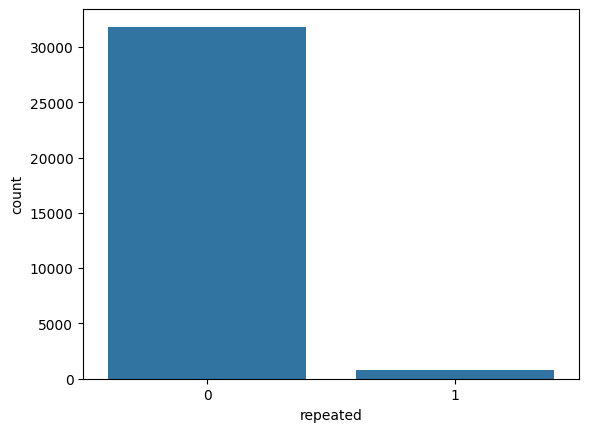

In [24]:
# repeated
sns.countplot(data = df_train, x = "repeated")

<Axes: xlabel='average price', ylabel='Count'>

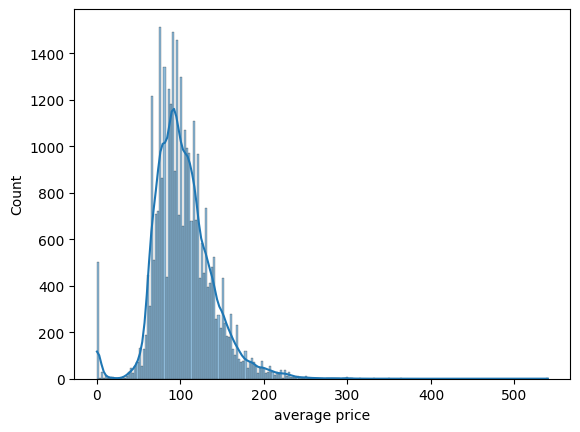

In [25]:
# Average price
sns.histplot(data = df_train, x = "average price", kde = True)

<Axes: xlabel='special requests', ylabel='count'>

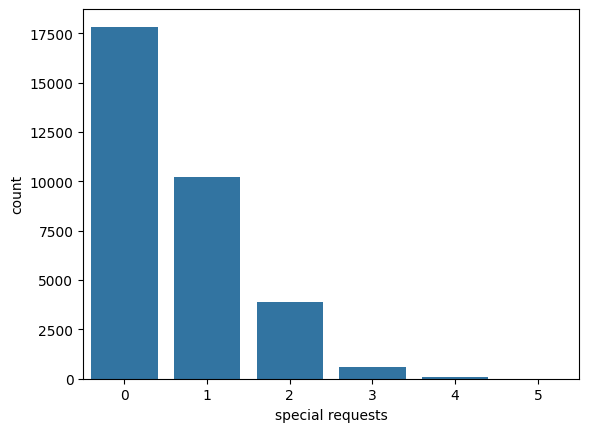

In [26]:
# Special requests
sns.countplot(data = df_train, x = "special requests")

In [27]:
from datetime import datetime
# Convert the 'date of reservation' column to datetime format
df_train['date of reservation'] = pd.to_datetime(df_train['date of reservation'], dayfirst = True, errors = 'coerce')

# Extract the month from the 'date of reservation' column
df_train['month of reservation'] = df_train['date of reservation'].dt.month


<ipython-input-27-01314c9bfe8e>:3: UserWarning: Parsing dates in MM/DD/YYYY format when dayfirst=True was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_train['date of reservation'] = pd.to_datetime(df_train['date of reservation'], dayfirst = True, errors = 'coerce')


<Axes: xlabel='month of reservation', ylabel='count'>

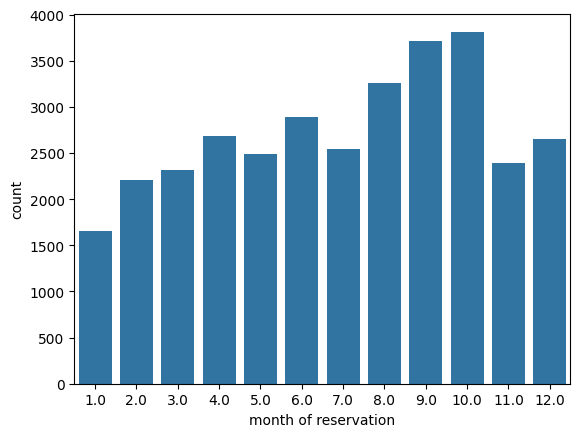

In [28]:
# month of reservation
sns.countplot(data = df_train, x = "month of reservation")

### Multivariate analysis

#### Analysing relationship between features and target


<Axes: xlabel='number of adults', ylabel='count'>

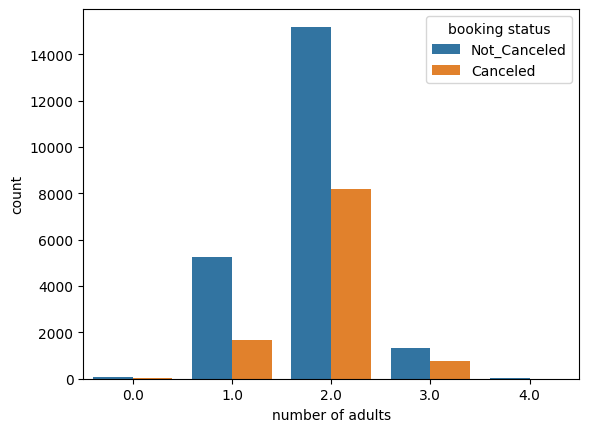

In [29]:
# number of adults and booking status
sns.countplot(data = df_train, x = "number of adults", hue = "booking status")

<Axes: xlabel='number of children', ylabel='count'>

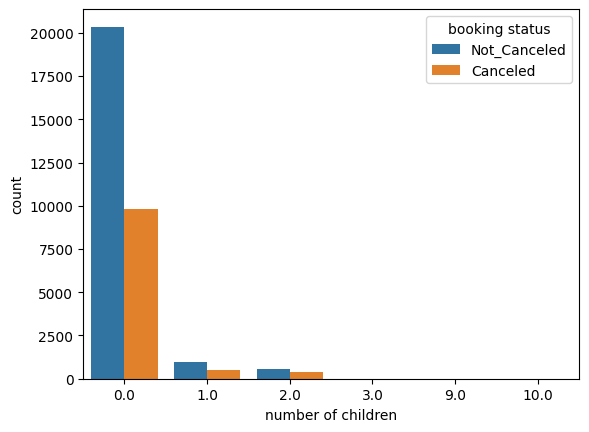

In [30]:
# number of children and booking status
sns.countplot(data = df_train, x = "number of children", hue = "booking status")

<Axes: xlabel='number of weekend nights', ylabel='count'>

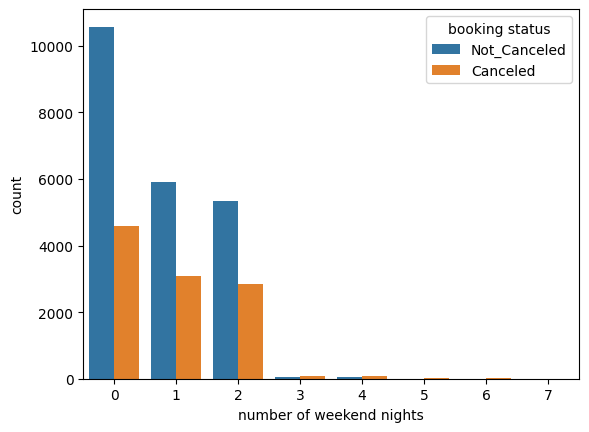

In [31]:
# number of weekend nights and booking status
sns.countplot(data = df_train, x = "number of weekend nights", hue = "booking status")

<Axes: xlabel='number of week nights', ylabel='count'>

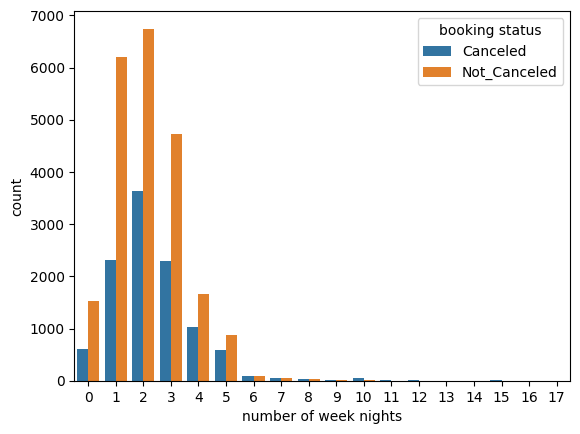

In [32]:
# number of week nights and booking status
sns.countplot(data = df_train, x = "number of week nights", hue = "booking status")

<Axes: xlabel='type of meal', ylabel='count'>

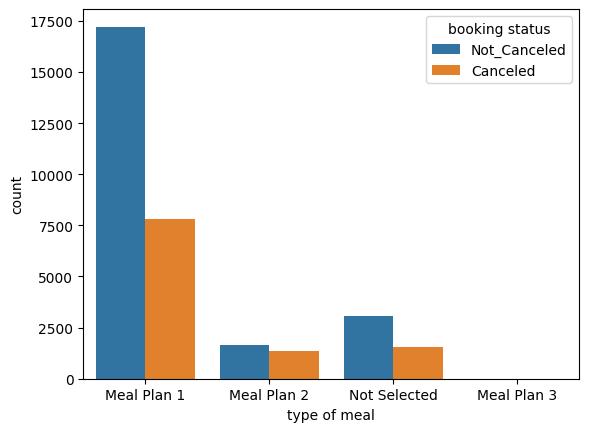

In [33]:
# number of type of meal and booking status
sns.countplot(data = df_train, x = "type of meal", hue = "booking status")

<Axes: xlabel='car parking space', ylabel='count'>

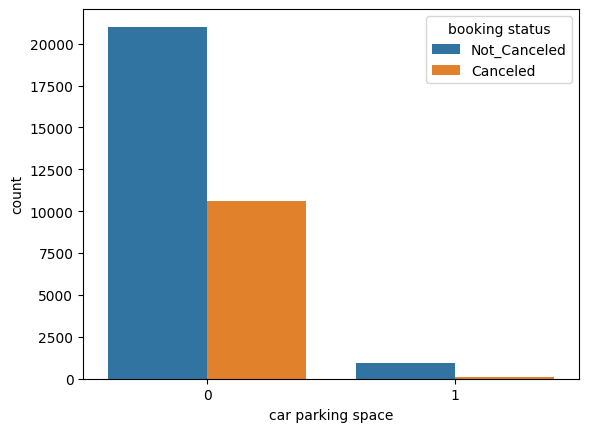

In [34]:
# number of car parking space and booking status
sns.countplot(data = df_train, x = "car parking space", hue = "booking status")

<Axes: xlabel='room type', ylabel='count'>

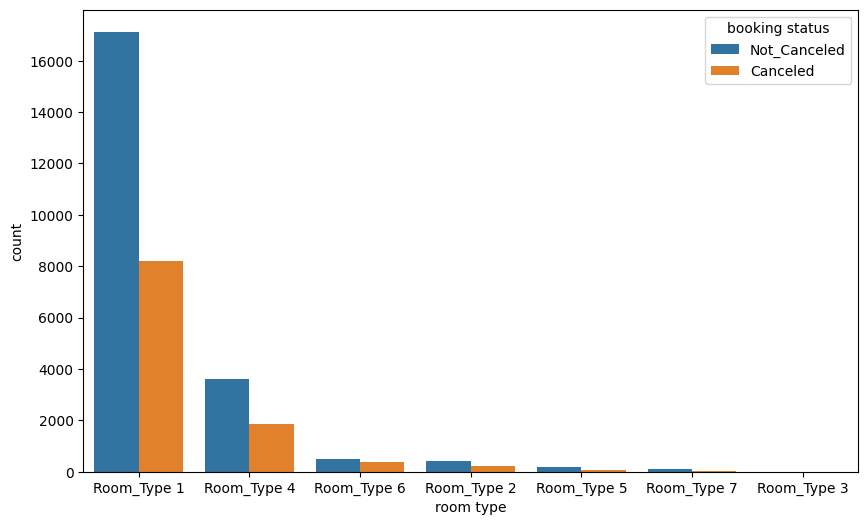

In [35]:
# number of room type and booking status
plt.figure(figsize=(10, 6))
sns.countplot(data = df_train, x = "room type", hue="booking status", order=df_train['room type'].value_counts().index)

<Axes: xlabel='lead time', ylabel='booking status'>

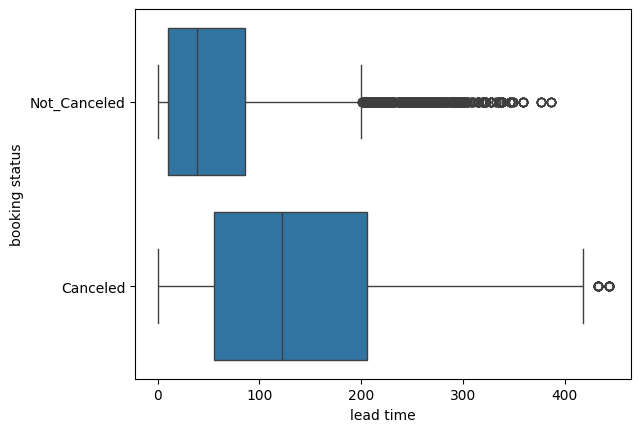

In [36]:
# lead time and booking status
sns.boxplot(data=df_train, x = "lead time", y = "booking status")

<Axes: xlabel='lead time', ylabel='Density'>

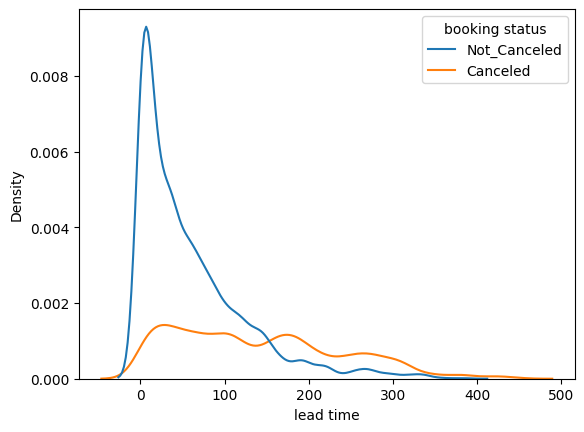

In [37]:
sns.kdeplot(data=df_train, x="lead time", hue="booking status")

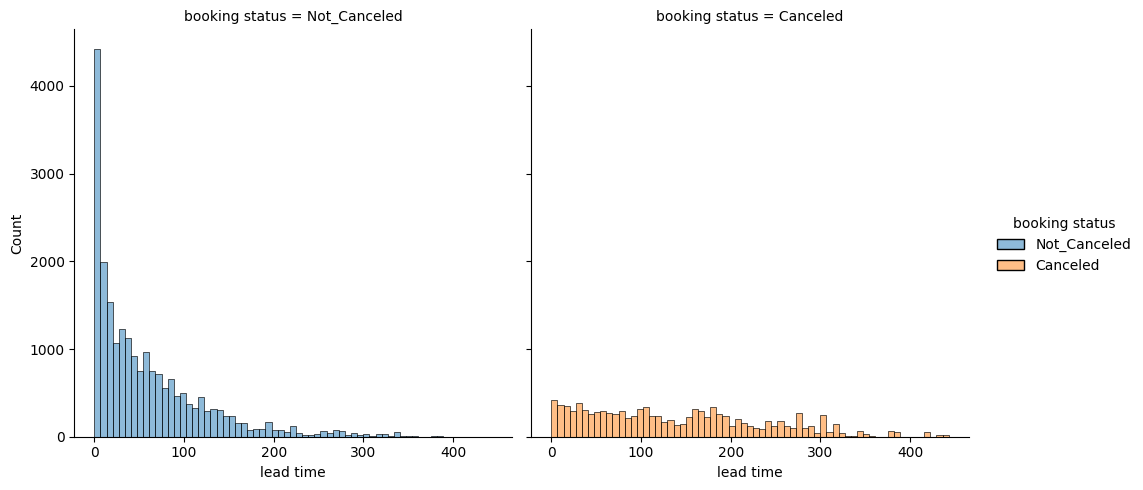

In [38]:
sns.displot(data=df_train, x="lead time", hue="booking status", col="booking status")

<Axes: xlabel='lead time', ylabel='Count'>

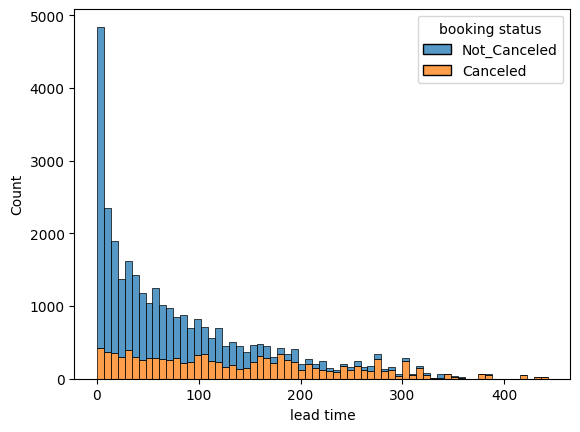

In [39]:
sns.histplot(data=df_train, x="lead time", hue="booking status", multiple="stack")

<Axes: xlabel='market segment type', ylabel='count'>

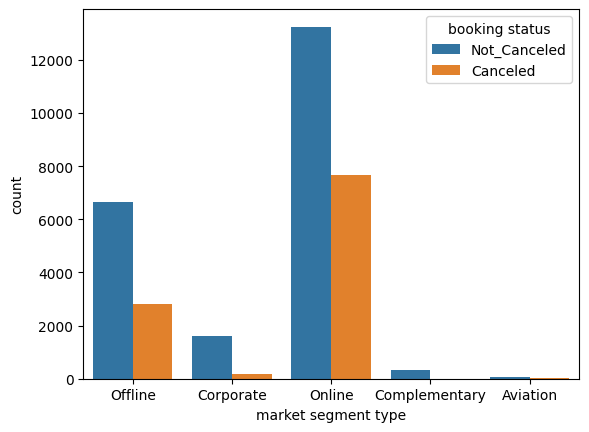

In [40]:
# market segment type
sns.countplot(data=df_train, x = "market segment type", hue = "booking status")

<Axes: xlabel='repeated', ylabel='count'>

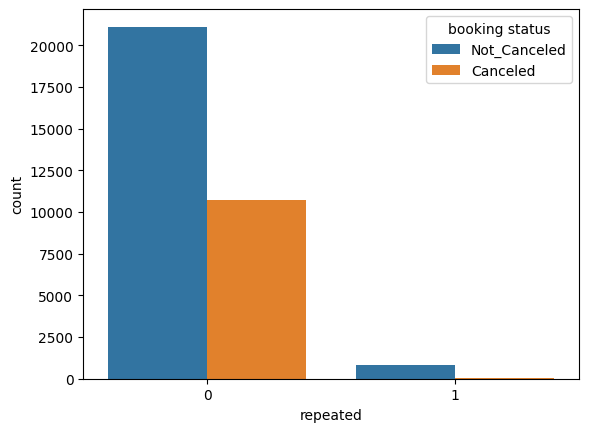

In [41]:
# repeated
sns.countplot(data=df_train, x = "repeated", hue = "booking status")

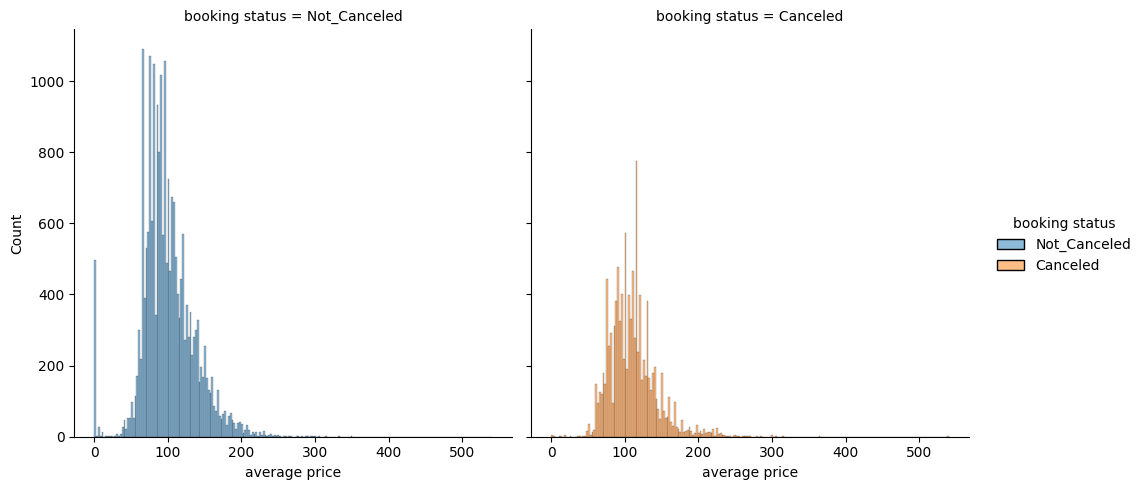

In [42]:
#Average price
sns.displot(data=df_train, x="average price", hue="booking status", col="booking status")

<Axes: xlabel='special requests', ylabel='count'>

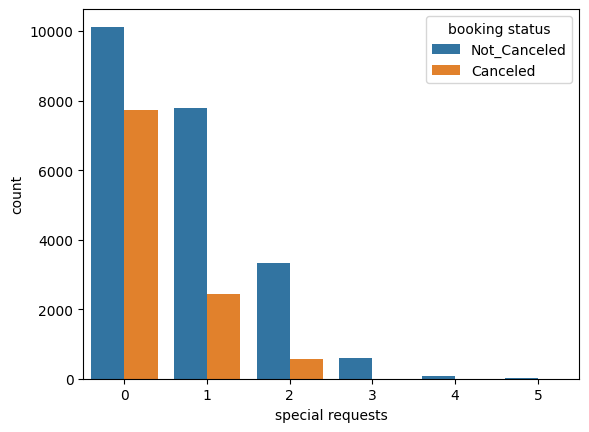

In [43]:
# Special requests
sns.countplot(data=df_train, x = "special requests", hue = "booking status")

<Axes: xlabel='month of reservation', ylabel='count'>

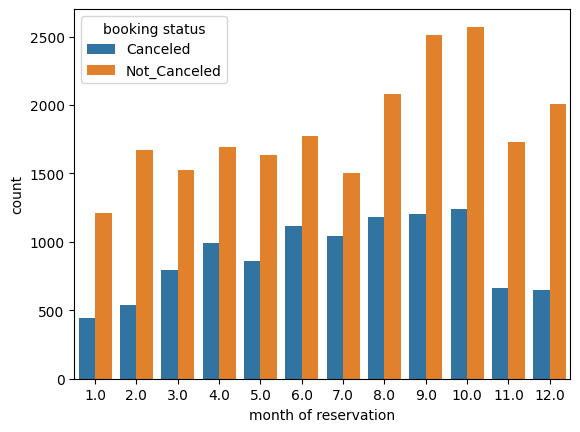

In [44]:
# Month of reservation
sns.countplot(data=df_train, x = "month of reservation", hue = "booking status")

#### Analysing relationship between features and features

<Axes: xlabel='average price', ylabel='room type'>

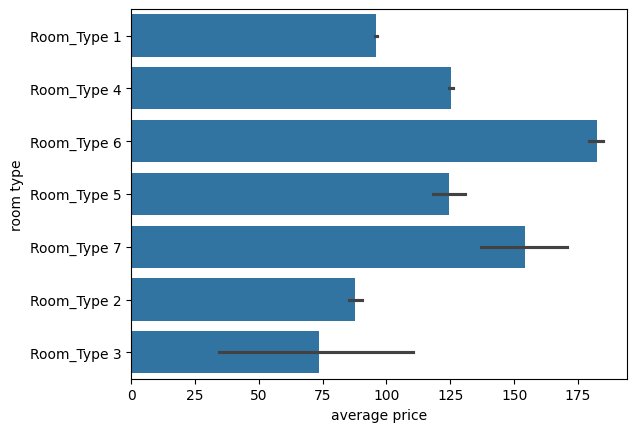

In [45]:
sns.barplot(data = df_train, y = "room type", x = "average price")

<Axes: xlabel='average price', ylabel='room type'>

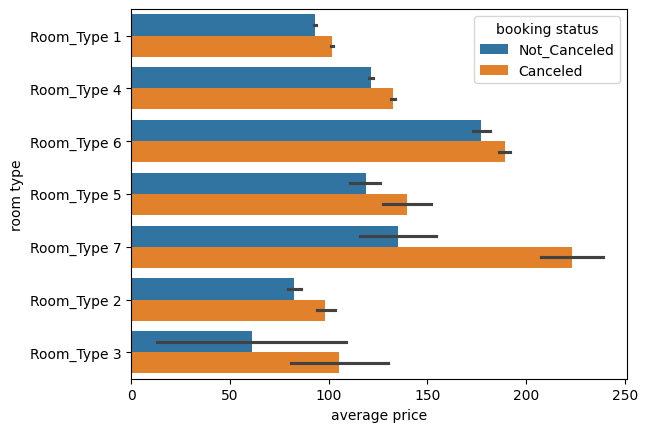

In [46]:
sns.barplot(data = df_train, y = "room type", x = "average price", hue = "booking status")

<Axes: xlabel='lead time', ylabel='average price'>

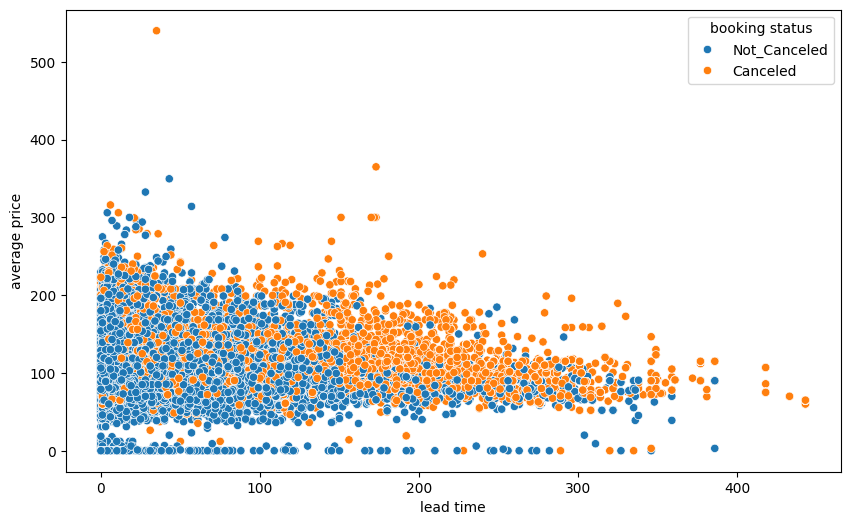

In [47]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df_train, x = "lead time", y = "average price", hue = "booking status")

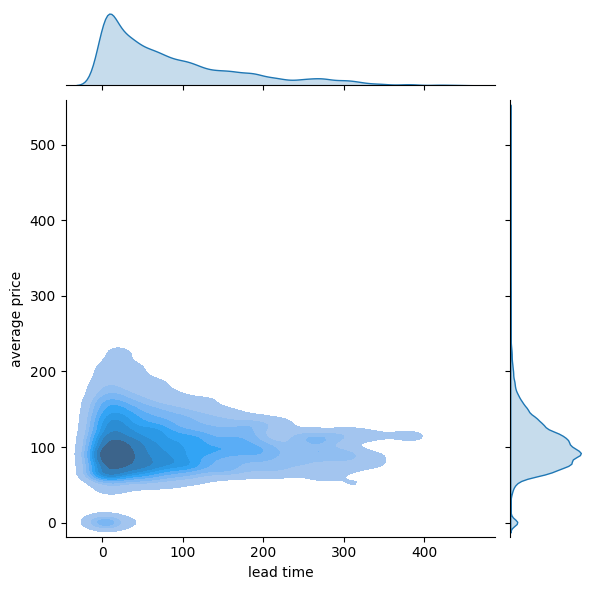

In [48]:
sns.jointplot(data = df_train, x = "lead time", y = "average price", kind="kde", fill="true")

<Axes: xlabel='market segment type', ylabel='lead time'>

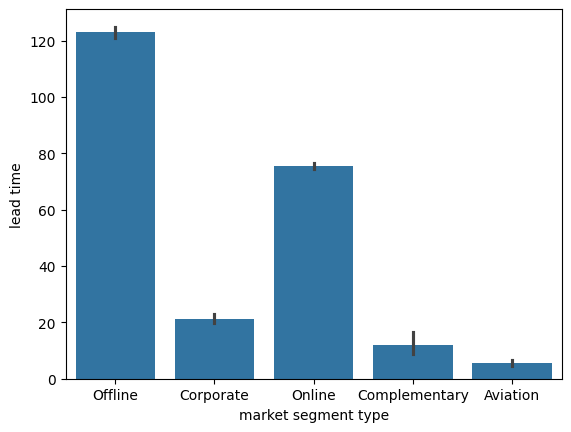

In [49]:
sns.barplot(data = df_train, x = "market segment type", y = "lead time")

<Axes: xlabel='market segment type', ylabel='lead time'>

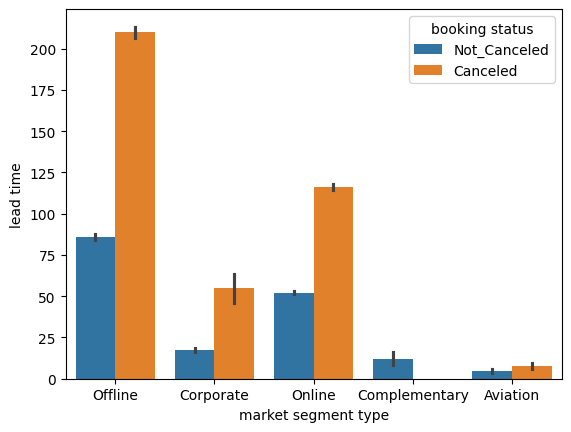

In [50]:
sns.barplot(data = df_train, x = "market segment type", y = "lead time", hue = "booking status")

<Axes: xlabel='month of reservation', ylabel='average price'>

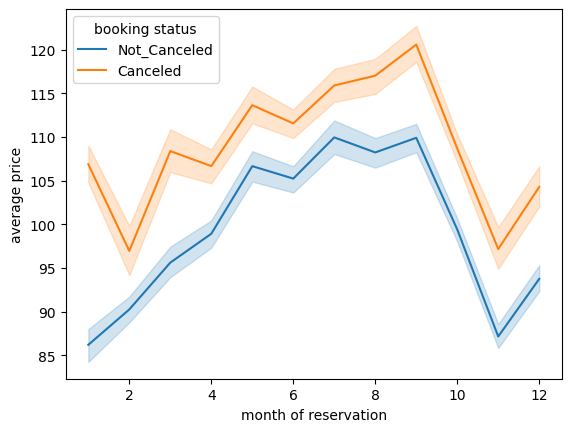

In [51]:
sns.lineplot(data = df_train, x = "month of reservation", y = "average price", hue = "booking status")

<Axes: xlabel='special requests', ylabel='average price'>

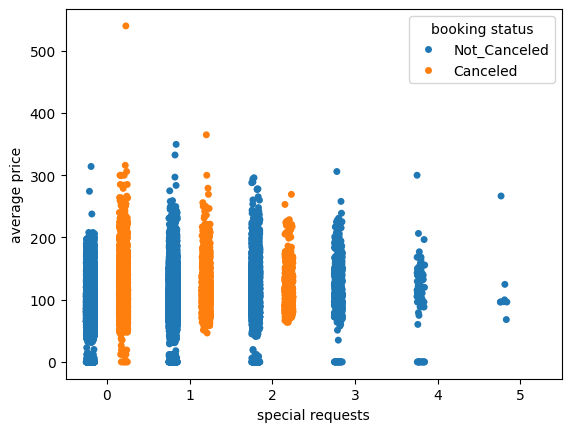

In [52]:
sns.stripplot(data = df_train, x = "special requests", y = "average price", hue = "booking status", dodge = "true")

In [53]:
subset_df = df_train[['repeated', 'P-C', 'P-not-C']]

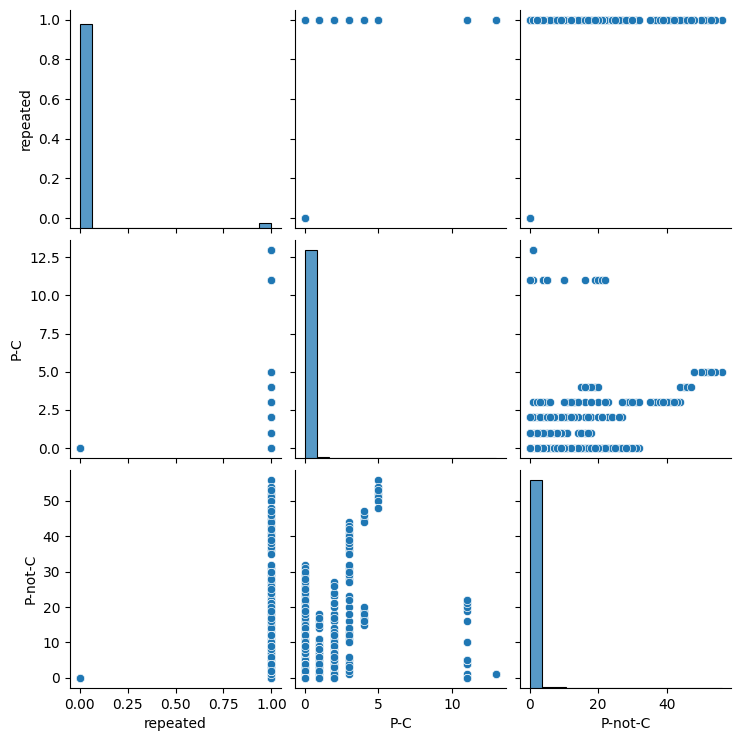

In [54]:
sns.pairplot(subset_df)

In [55]:
corr_check1 = subset_df.corr(method='pearson')
corr_check1

,repeated,P-C,P-not-C
repeated,1.000000,0.386208,0.543505
P-C,0.386208,1.000000,0.448234
P-not-C,0.543505,0.448234,1.000000


<Axes: >

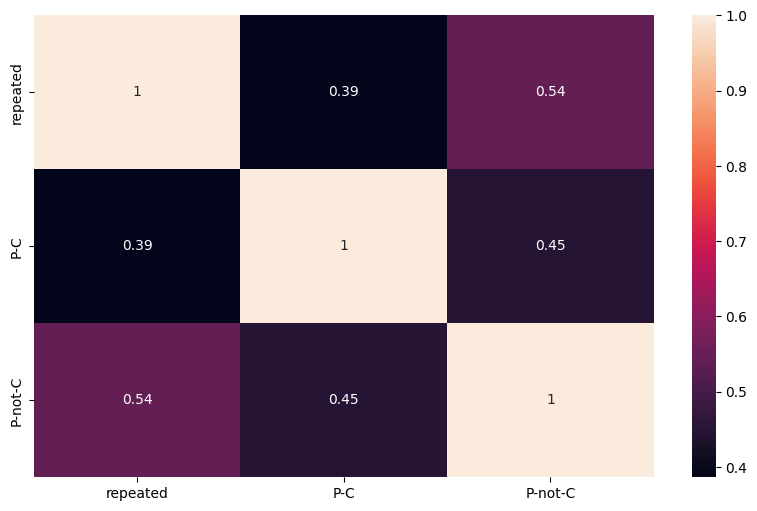

In [56]:
plt.figure(figsize = (10,6))
sns.heatmap(corr_check1, annot=True)

In [57]:
# correlation/relationship between numerical variables
df_train_corr = df_train.corr()
df_train_corr

<ipython-input-57-d4ebf3db8862>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train_corr = df_train.corr()


,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests,month of reservation
number of adults,1.000000,-0.021301,0.104062,0.105217,0.011953,0.093496,-0.189772,-0.044268,-0.118248,0.297139,0.189778,0.021657
number of children,-0.021301,1.000000,0.028343,0.027355,0.036063,-0.048441,-0.036858,-0.016272,-0.021430,0.336174,0.122983,0.002574
number of weekend nights,0.104062,0.028343,1.000000,0.179348,-0.032624,0.044773,-0.065585,-0.018939,-0.025530,-0.004145,0.055180,-0.000728
number of week nights,0.105217,0.027355,0.179348,1.000000,-0.049125,0.147290,-0.099902,-0.029258,-0.049620,0.023773,0.047045,0.009086
car parking space,0.011953,0.036063,-0.032624,-0.049125,1.000000,-0.067548,0.111773,0.023516,0.056952,0.063560,0.086891,-0.005960
lead time,0.093496,-0.048441,0.044773,0.147290,-0.067548,1.000000,-0.135788,-0.044459,-0.078999,-0.064524,-0.103425,0.045057
repeated,-0.189772,-0.036858,-0.065585,-0.099902,0.111773,-0.135788,1.000000,0.386208,0.543505,-0.173093,-0.010282,0.003422
P-C,-0.044268,-0.016272,-0.018939,-0.029258,0.023516,-0.044459,0.386208,1.000000,0.448234,-0.060721,-0.003581,-0.013277
P-not-C,-0.118248,-0.021430,-0.025530,-0.049620,0.056952,-0.078999,0.543505,0.448234,1.000000,-0.115285,0.025661,-0.000270
average price,0.297139,0.336174,-0.004145,0.023773,0.063560,-0.064524,-0.173093,-0.060721,-0.115285,1.000000,0.185118,0.030232


<Axes: >

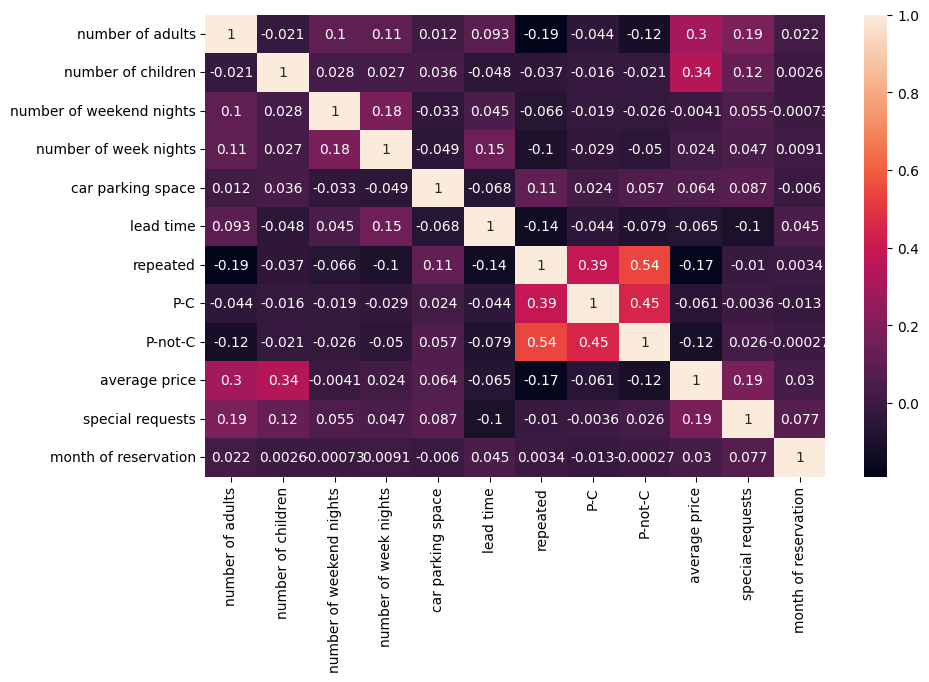

In [58]:
plt.figure(figsize = (10,6))
sns.heatmap(df_train_corr, annot=True)

## Pre-processing and transformation

In [85]:
# import data again
booking = pd.read_csv("/content/drive/MyDrive/ai-ml/final-project/booking_with_null.csv")

In [86]:
booking.drop(["Booking_ID"], axis=1, inplace=True)
booking.index = booking.index + 1

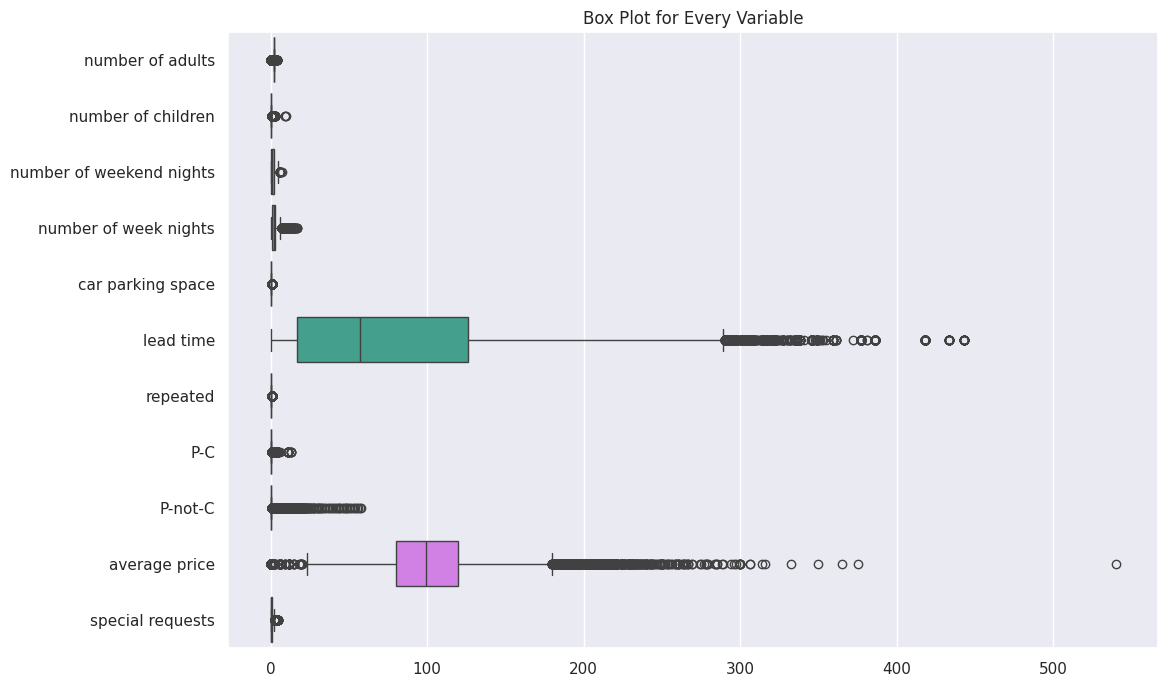

(36285, 16)


In [87]:
# Create box plots for every variable before droping outliers
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")
sns.boxplot(data=booking, orient="h")
plt.title("Box Plot for Every Variable")
plt.show()
print(booking.shape)

In [88]:
# drop outliers
outliers_cols = ["lead time", "average price"]
for column in outliers_cols:
    if booking[column].dtype in ["int64", "float64"]:
        q1 = booking[column].quantile(0.25)
        q3 = booking[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        booking = booking[
            (booking[column] >= lower_bound) & (booking[column] <= upper_bound)
        ]

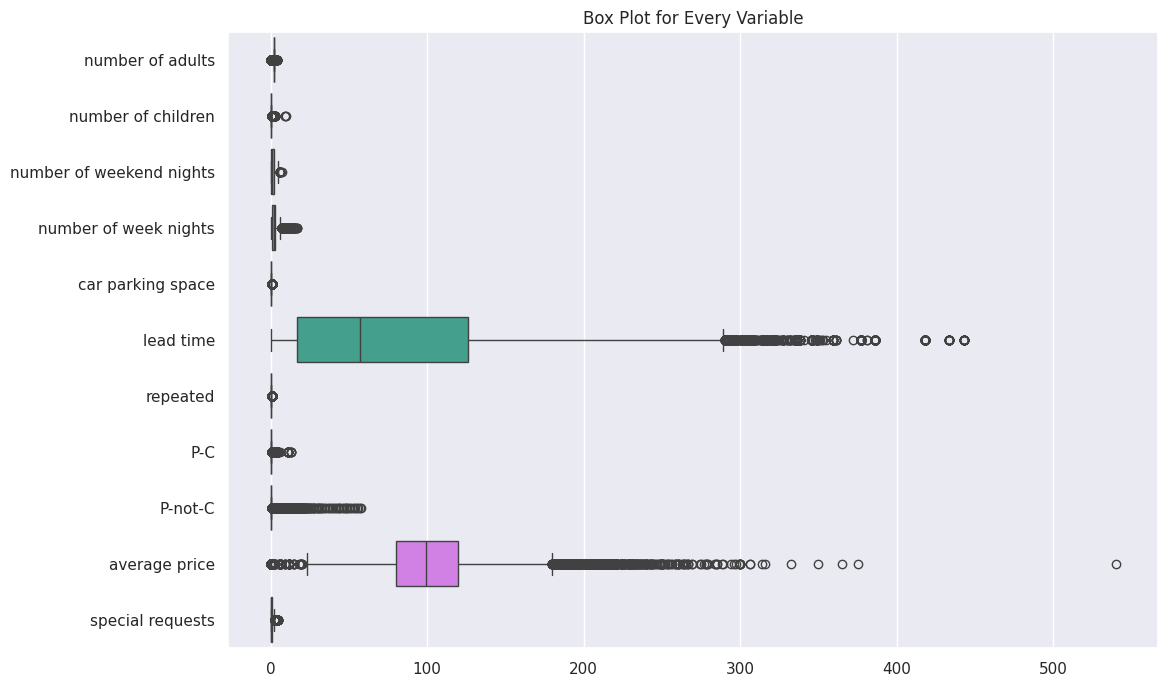

(36285, 17)


In [89]:
# Create box plots for every variable afterdroping outliers
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")
sns.boxplot(data=df, orient="h")
plt.title("Box Plot for Every Variable")
plt.show()
print(df.shape)

In [90]:
# Binarizing the target column
booking["booking status"] = booking["booking status"].replace("Canceled", 1)
booking["booking status"] = booking["booking status"].replace("Not_Canceled", 0)

In [91]:
# Split the date to (day/month/year) & Drop the date in wrong format
booking = booking[~booking["date of reservation"].str.contains("-")]
booking["date of reservation"] = pd.to_datetime(booking["date of reservation"])

# Keep the month attribute
booking["month"] = booking["date of reservation"].dt.month

# Drop the original datetime column
booking = booking.drop(columns=["date of reservation"])
booking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33312 entries, 1 to 36285
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          33218 non-null  float64
 1   number of children        33219 non-null  float64
 2   number of weekend nights  33312 non-null  int64  
 3   number of week nights     33312 non-null  int64  
 4   type of meal              33312 non-null  object 
 5   car parking space         33312 non-null  int64  
 6   room type                 33312 non-null  object 
 7   lead time                 33312 non-null  int64  
 8   market segment type       33312 non-null  object 
 9   repeated                  33312 non-null  int64  
 10  P-C                       33312 non-null  int64  
 11  P-not-C                   33312 non-null  int64  
 12  average price             33312 non-null  float64
 13  special requests          33312 non-null  int64  
 14  bookin

<ipython-input-91-76110b32edff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booking["date of reservation"] = pd.to_datetime(booking["date of reservation"])
<ipython-input-91-76110b32edff>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booking["month"] = booking["date of reservation"].dt.month


In [92]:
# Impute missing values by filling in with rounded mean values
# calculate mean on training set
median_num_of_adults = round(booking['number of adults'].mean())
median_num_of_children = round(booking['number of children'].mean())

# fill these values in null places
booking['number of adults'].fillna(median_num_of_adults, inplace = True)
booking['number of children'].fillna(median_num_of_children, inplace = True)

In [93]:
#Handle imbalanced dataset
from imblearn.over_sampling import SMOTENC

# Specify the categorical feature indices
cat_feature_indices = [4, 6, 8]

smotenc = SMOTENC(categorical_features=cat_feature_indices,random_state = 11)

In [94]:
features = booking.drop(["booking status"], axis=1)
target = booking["booking status"]
features, target = smotenc.fit_resample(features, target)

In [95]:
# Check again after oversampling
from collections import Counter
counter = Counter(target)
target.value_counts()

0    22895
1    22895
Name: booking status, dtype: int64

In [96]:
# check number of unique categories
features[['type of meal', 'market segment type', 'room type']].nunique()

type of meal           3
market segment type    5
room type              7
dtype: int64

In [97]:
# one hot encoding
object_columns = features.select_dtypes(include=["object"]).columns
features = pd.get_dummies(features, columns=object_columns)
features = features.replace({True: 1, False: 0})
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45790 entries, 0 to 45789
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   number of adults                   45790 non-null  float64
 1   number of children                 45790 non-null  float64
 2   number of weekend nights           45790 non-null  int64  
 3   number of week nights              45790 non-null  int64  
 4   car parking space                  45790 non-null  int64  
 5   lead time                          45790 non-null  int64  
 6   repeated                           45790 non-null  int64  
 7   P-C                                45790 non-null  int64  
 8   P-not-C                            45790 non-null  int64  
 9   average price                      45790 non-null  float64
 10  special requests                   45790 non-null  int64  
 11  month                              45790 non-null  int

In [99]:
# Feature selection
from sklearn.feature_selection import SelectKBest, f_classif
k_best = SelectKBest(score_func=f_classif, k=10)

X = k_best.fit_transform(features, target)
y = target

# Get the indices of the selected features
selected_features_indices = k_best.get_support(indices=True)

# Get the scores associated with each feature
feature_scores = k_best.scores_

# Create a list of tuples containing feature names and scores
feature_info = list(zip(features.columns, feature_scores))

# Sort the feature info in descending order based on scores
sorted_feature_info = sorted(feature_info, key=lambda x: x[1], reverse=True)

for feature_name, feature_score in sorted_feature_info[:10]:
    print(f"{feature_name}: {feature_score:.2f}")

lead time: 9505.62
special requests: 6113.11
market segment type_Online: 1185.75
average price: 998.56
market segment type_Corporate: 927.13
repeated: 774.46
car parking space: 627.54
market segment type_Offline: 453.45
number of adults: 287.49
P-not-C: 212.42


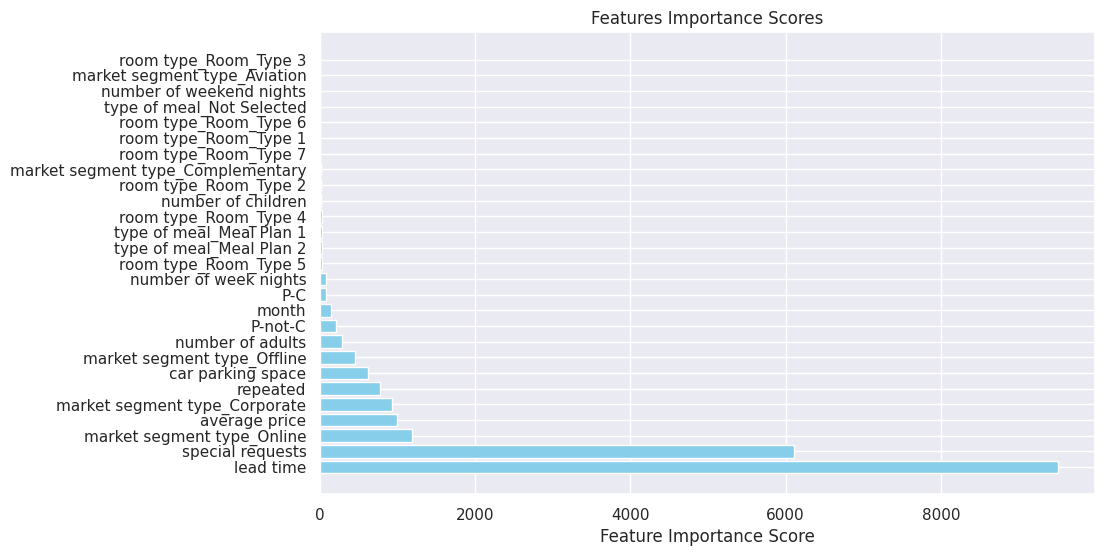

In [100]:
# Visualize the relation between features with their score and the target variable
feature_names, feature_scores = zip(*sorted_feature_info[:])

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_scores, color="skyblue")
plt.xlabel("Feature Importance Score")
plt.title("Features Importance Scores")
plt.show()

In [126]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, target, test_size=0.1, random_state=11)

In [102]:
# scaling: training model with and without scaling showed no difference
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

## Modelling

In [103]:
from xgboost import XGBClassifier

In [104]:
# Create a base xgbclassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=11)

In [105]:
# Train model on training set
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=11, ...)

In [113]:
# cross validation with StratifiedKFold
from sklearn.model_selection import cross_validate, StratifiedKFold

skf = StratifiedKFold(n_splits=5, random_state=11, shuffle=True)

cv_results = cross_validate(model, X_train, y_train, cv=skf,
                            scoring=["f1", "roc_auc"])
print(f"""
F1 Score - cross validation: {cv_results['test_f1'].mean()}
Roc Auc - cross validation: {cv_results['test_roc_auc'].mean()}""")


F1 Score - cross validation: 0.8820336497407781
Roc Auc - cross validation: 0.9508577536193513


In [125]:
# confusion matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(model, X_train, y_train, cv=skf)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[18244,  2337],
       [ 2510, 18120]])

In [110]:
# Evaluation on test set
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

In [111]:
print("F1 Score - test set:", f1)
print("ROC AUC- test set:", roc_auc)

F1 Score - test set: 0.8841220698805837
ROC AUC- test set: 0.8855327300375294


## Tuning

In [114]:
from sklearn.model_selection import GridSearchCV

In [118]:
# Define hyperparameter grid
xgboost_params = {"learning_rate": [0.01, 0.5 ,0.1, None],
               "n_estimators": [100, 300, 500, 600, None],
               "colsample_bytree": [0.5, 1, None]}

In [119]:
# Perform grid search for XGBoost model using GridSearchCV
grid_search_xgb = GridSearchCV(model, param_grid=xgboost_params, cv=skf)

grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=11, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importanc...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=11, ...),
             param_grid={'colsample_bytree': [0.5, 1, None],
                         'learning_rate': [0.01, 0.5, 0.1, None],
                         'n_estimators': [100, 300, 500, 600, None]})

In [120]:
# access the best hyperparameters
best_params_xgb = grid_search_xgb.best_params_
best_params_xgb

{'colsample_bytree': 1, 'learning_rate': None, 'n_estimators': 500}

In [121]:
# Select the best model with best parameters
best_model_xgb = grid_search_xgb.best_estimator_

In [122]:
# Train the best model again on training set
best_model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=11, ...)

In [123]:
# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

In [124]:
print("F1 Score - after tuning:", f1)
print("ROC AUC - after tuning:", roc_auc)

F1 Score - after tuning: 0.8841220698805837
ROC AUC - after tuning: 0.8855327300375294
